<img src='https://www.anadronestarting.com/wp-content/uploads/intel-main_opt.png' width=50%>

# 모바일넷을 이용한 이미지분류 - MNIST
<font size=5><b>(Image Classification using Mobilenet)<b></font>

<div align='right'>성  민  석 (Minsuk Sung)</div>
<div align='right'>이  인  구 (Ike Lee)</div>

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/440px-MnistExamples.png' width=60%>

---

<h1>강의목차<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#필요한-라이브러리-및-옵션" data-toc-modified-id="필요한-라이브러리-및-옵션-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>필요한 라이브러리 및 옵션</a></span><ul class="toc-item"><li><span><a href="#기본-라이브러리(Library)" data-toc-modified-id="기본-라이브러리(Library)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>기본 라이브러리(Library)</a></span></li><li><span><a href="#Keras,-Tensorflow와-손을-잡다!" data-toc-modified-id="Keras,-Tensorflow와-손을-잡다!-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Keras, Tensorflow와 손을 잡다!</a></span><ul class="toc-item"><li><span><a href="#신경망-구현-순서¶" data-toc-modified-id="신경망-구현-순서¶-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>신경망 구현 순서¶</a></span></li></ul></li><li><span><a href="#옵션(Option)" data-toc-modified-id="옵션(Option)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>옵션(Option)</a></span></li></ul></li><li><span><a href="#예제---MNIST" data-toc-modified-id="예제---MNIST-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>예제 - MNIST</a></span><ul class="toc-item"><li><span><a href="#MNIST-데이터-불러오기" data-toc-modified-id="MNIST-데이터-불러오기-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>MNIST 데이터 불러오기</a></span></li><li><span><a href="#MNIST-데이터-형태-확인하기" data-toc-modified-id="MNIST-데이터-형태-확인하기-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>MNIST 데이터 형태 확인하기</a></span><ul class="toc-item"><li><span><a href="#Train-데이터셋" data-toc-modified-id="Train-데이터셋-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Train 데이터셋</a></span></li><li><span><a href="#Validation-데이터셋" data-toc-modified-id="Validation-데이터셋-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Validation 데이터셋</a></span></li><li><span><a href="#Test-데이터셋" data-toc-modified-id="Test-데이터셋-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Test 데이터셋</a></span></li></ul></li><li><span><a href="#데이터-시각화하기" data-toc-modified-id="데이터-시각화하기-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>데이터 시각화하기</a></span></li><li><span><a href="#데이터-전처리" data-toc-modified-id="데이터-전처리-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>데이터 전처리</a></span></li><li><span><a href="#모델링" data-toc-modified-id="모델링-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>모델링</a></span><ul class="toc-item"><li><span><a href="#모델-구성" data-toc-modified-id="모델-구성-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>모델 구성</a></span></li><li><span><a href="#모델-컴파일" data-toc-modified-id="모델-컴파일-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>모델 컴파일</a></span></li><li><span><a href="#모델-확인" data-toc-modified-id="모델-확인-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>모델 확인</a></span></li></ul></li><li><span><a href="#신경망-모델-학습" data-toc-modified-id="신경망-모델-학습-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>신경망 모델 학습</a></span></li><li><span><a href="#신경망-모델-평가" data-toc-modified-id="신경망-모델-평가-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>신경망 모델 평가</a></span></li><li><span><a href="#신경망-모델-검증하기" data-toc-modified-id="신경망-모델-검증하기-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>신경망 모델 검증하기</a></span></li><li><span><a href="#다음-예제에서는" data-toc-modified-id="다음-예제에서는-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>다음 예제에서는</a></span></li></ul></li><li><span><a href="#참고" data-toc-modified-id="참고-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>참고</a></span></li></ul></div>

## 필요한 라이브러리 및 옵션

### 기본 라이브러리(Library)

In [1]:
import os
import sys
import glob
import random
import warnings
import itertools
from tqdm import tqdm
from pathlib import Path

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
import cv2
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from IPython.display import SVG
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import Element, ElementTree

### Keras, Tensorflow와 손을 잡다!

> Tensorflow + Keras = tf.Keras !!

<img src='https://blog.keras.io/img/keras-tensorflow-logo.jpg' width=80%>

In [4]:
import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist,cifar10
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.applications import MobileNet, MobileNetV2
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Conv2D,GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import Callback
from tensorflow.python.client import device_lib

Using TensorFlow backend.
/home/intel/test/vtest/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/intel/test/vtest/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/intel/test/vtest/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/intel/test/vtest/lib/python3.5/site-packages/tenso

#### 신경망 구현 순서¶
Keras 를 사용하면 다음과 같은 순서로 신경망을 구성할 수 있다.

1. Sequential 모형 클래스 객체 생성


2. add 메서드로 레이어 추가.

    - 입력단부터 순차적으로 추가한다.
    - 레이어는 출력 뉴런 갯수를 첫번째 인수로 받는다.
    - 최초의 레이어는 input_dim 인수로 입력 크기를 설정해야 한다.
    - activation 인수로 활성화함수 설정


3. compile 메서드로 모형 완성.

    - loss인수로 비용함수 설정
    - optimizer 인수로 최적화 알고리즘 설정
    - metrics 인수로 트레이닝 단계에서 기록할 성능 기준 설정


4. fit 메서드로 트레이닝

    - nb_epoch 로 에포크(epoch) 횟수 설정
    - batch_size 로 배치크기(batch size) 설정
    - verbose는 학습 중 출력되는 문구를 설정하는 것으로, 주피터노트북(Jupyter Notebook)을 사용할 때는 verbose=2로 설정하여 진행 막대(progress bar)가 나오지 않도록 설정한다.

### 옵션(Option)

In [5]:
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

# warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

%matplotlib inline
# print(device_lib.list_local_devices())
# keras.backend.tensorflow_backend._get_available_gpus()

---

## 예제 - MNIST

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

MNIST 데이터베이스 (Modified National Institute of Standards and Technology database)는 손으로 쓴 **`0~9까지 숫자`들로 이루어진 대형 데이터베이스**이며, 다양한 화상 처리 시스템을 트레이닝하기 위해 일반적으로 사용된다. 이 데이터베이스는 또한 기계 학습 분야의 트레이닝 및 테스트에 널리 사용된다. NIST의 오리지널 데이터셋의 샘플을 재혼합하여 만들어졌다. 개발자들은 NIST의 트레이닝 데이터셋이 미국의 인구조사국 직원들로부터 취합한 이후로 테스팅 데이터셋이 미국의 중등학교 학생들로부터 취합되는 중에 기계 학습 실험에 딱 적합하지는 않은 것을 느꼈다. 게다가 NIST의 흑백 그림들은 28x28 픽셀의 바운딩 박스와 앤티엘리어싱 처리되어 그레이스케일 레벨이 들어가 있도록 평준화되었다. MNIST sample images. MNIST 테스트 데이터셋의 샘플 이미지. MNIST 데이터베이스는 **`60,000개의 트레이닝 이미지와 10,000개의 테스트 이미지를 포함`** 한다. 트레이닝 세트의 절반과 테스트 세트의 절반은 NIST의 트레이닝 데이터셋에서 취합하였으며, 그 밖의 트레이닝 세트의 절반과 테스트 세트의 절반은 NIST의 테스트 데이터셋으로부터 취합되었다.

출처 : [위키백과](https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4)

### MNIST 데이터 불러오기

Keras에서는 MNIST와 같이 보편적으로 많이 쓰이는 데이터를 쉽게 가져올 수 있는 함수가 준비되어있다.  
처음 함수 호출시에는 데이터 다운로드를 하기 위해서 어느정도 시간이 소요될 수 있다.

In [6]:
# Keras에서 제공하는 MNIST 데이터를 불러오는 함수 : mnist.load_data()
(X_train, y_train), (X_test,y_test) = mnist.load_data() 

In [7]:
# Train / Validation 데이터 분리하기
# Train 데이터를 Train / Validation 으로 나누어줌으로써 Overfitting 여부를 파악
X_train, X_valid = X_train[:50000], X_train[50000:]
y_train, y_valid = y_train[:50000], y_train[50000:]

In [8]:
# Train / Test 데이터의 크기 확인
print('MNIST Train 데이터의 크기 : {}'.format(len(X_train)))
print('MNIST Validation 데이터의 크기 : {}'.format(len(X_valid)))
print('MNIST Test 데이터의 크기 : {}'.format(len(X_test)))

MNIST Train 데이터의 크기 : 50000
MNIST Validation 데이터의 크기 : 10000
MNIST Test 데이터의 크기 : 10000


### MNIST 데이터 형태 확인하기

#### Train 데이터셋

In [9]:
print("X_train Shape : ",X_train.shape) # 28*28짜리 크기의 숫자 이미지 50000개
print("y_train Shape : ",y_train.shape) # 각 이미지별 레이블 50000개

X_train Shape :  (50000, 28, 28)
y_train Shape :  (50000,)


#### Validation 데이터셋

In [10]:
print("X_val Shape : ",X_valid.shape) # 28*28짜리 크기의 숫자 이미지 10000개
print("y_val Shape : ",y_valid.shape) # 각 이미지별 레이블 10000개

X_val Shape :  (10000, 28, 28)
y_val Shape :  (10000,)


#### Test 데이터셋

In [11]:
print("X_test Shape : ",X_test.shape) # 28*28짜리 크기의 숫자 이미지 60000개
print("y_test Shape : ",y_test.shape) # 각 이미지별 레이블 60000개

X_test Shape :  (10000, 28, 28)
y_test Shape :  (10000,)


### 데이터 시각화하기

그러면 이제 구체적으로 MNIST의 Train 데이터셋의 첫번재 데이터를 확인해보자.

In [12]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

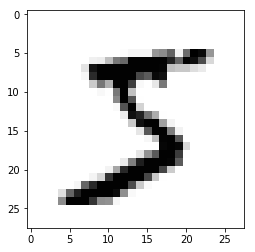

In [13]:
plt.imshow(X_train[0], cmap='Greys', interpolation='nearest')
plt.show()

50000개의 중 랜덤으로 한번 살펴보자

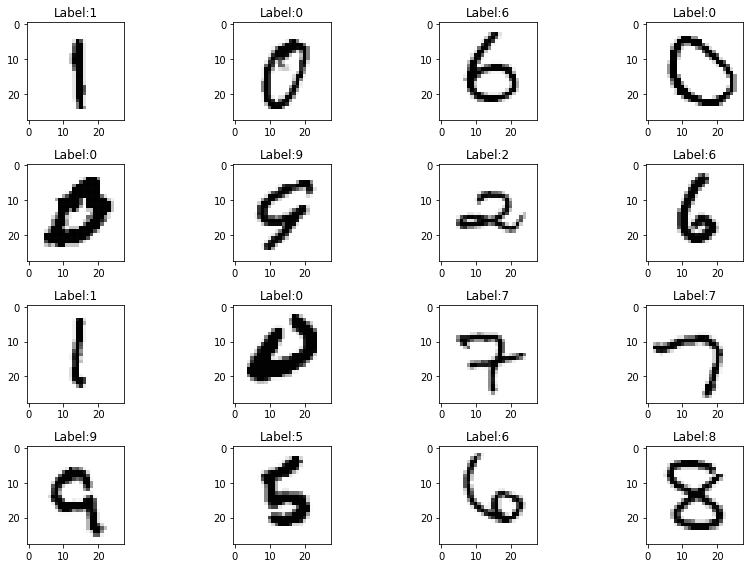

In [14]:
# 재연성을 위하여 랜덤시드 고정
np.random.seed(1234)  

# random 함수를 통해서 임의의 16개 데이터 가져오기
samples = np.random.randint(0,len(X_train)+1,size=16)

# MNIST를 그릴 Figure 준비
plt.figure(figsize=(12,8))

# 16개의 이미지 시각화
for count, n in enumerate(samples,start=1):
    plt.subplot(4, 4, count)
    plt.imshow(X_train[n], cmap='Greys', interpolation='nearest')
    label_name = "Label:" + str(y_train[n])
    plt.title(label_name)

plt.tight_layout()
plt.show()

### 데이터 전처리

In [15]:
# 데이터 크기 조정(Data Reshape)
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_valid = X_valid.reshape(X_valid.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

# 데이터 포맷 바꾸기
# 정수(int)인 데이터에서 실수(float)으로 변환
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')

# 데이터 정규화(Data Regularization)
# 이 과정을 통해서 추후 학습할 신경망이 조금 더 학습이 원할히 될 수 있게함
X_train = X_train / 255
X_valid = X_valid / 255
X_test = X_test / 255

# 원-핫 인코딩(One Hot Encoding)
# Keras의 to_categorical함수를 통해서 모든 Train 데이터의 레이블을 벡터화(Vectorize)
# ex) [3] -> [0 0 0 1 0 0 0 0 0 0]
y_train = to_categorical(y_train, 10) 
y_valid = to_categorical(y_valid,10)
y_test = to_categorical(y_test, 10)

### 모델링

간단하게 CNN 모델을 이용하여, MNIST 데이터를 분류해보자.

In [16]:
INPUT_SHAPE = (28,28,1)
KERNEL_SIZE = (3, 3)
DROP_RATE = 0.3

#### 모델 구성
Keras에서는 add함수를 통해서 레고 블록을 조립하듯이, 원하는 Layer를 추가 가능함  
여기서는 Conv Layer와 MaxPooling Layer 그리고 Dense Layer를 이용하여 모델을 구성하도록 하자

In [17]:
model = Sequential()

# 1번쨰 ConvNet
# Conv Layer
model.add(Conv2D(filters=64,
                 kernel_size=KERNEL_SIZE,
                 activation='relu',
                 input_shape=INPUT_SHAPE
                 ))
# Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2번쨰 Conv Layer
# Conv Layer
model.add(Conv2D(filters=128,
                 kernel_size=KERNEL_SIZE,
                 activation='relu',
                 ))
# Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# 분류를 하기 위해 shape을 1차원으로 맞추는 Layer
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(rate=DROP_RATE))

# 마지막 분류를 하기 위한 Fully Connected Layer
# One Hot Encoding을 했으므로 activation function은 softmax로 처리함
model.add(Dense(units=10, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


#### 모델 컴파일

In [18]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['acc'])

#### 모델 확인

In [19]:
model.summary()

plot_model(model, to_file='./img/model/mnist_cnn_model.png', show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3277824   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

### 신경망 모델 학습

Keras의 `fit`의 메소드를 통해서 간단하게 학습가능하다. 이번 예제에서는 여기서는 10번의 epoch만으로 학습을 진행하도록 한다. 그리고 앞서 준비한 검증 데이터(Validation Set)을 통해서 신경망의 오버피팅 여부를 판단하도록 하자.

In [20]:
EPOCHS = 3
BATCH_SIZE = 64

In [ ]:
history = model.fit(X_train,  # 학습할 데이터
                    y_train,  # 학습할 레이블
                    epochs=EPOCHS,  # 전체 학습할 횟수
                    batch_size=BATCH_SIZE,  # 배치 사이즈
                    use_multiprocessing=True,
                    validation_data=(X_valid, y_valid) # 검증 데이터로 확인
                   )

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 49s 988us/sample - loss: 0.1317 - acc: 0.9596 - val_loss: 0.0494 - val_acc: 0.9855
Epoch 2/3
50000/50000 [==============================] - 51s 1ms/sample - loss: 0.0413 - acc: 0.9872 - val_loss: 0.0545 - val_acc: 0.9844
Epoch 3/3
 1920/50000 [>.............................] - ETA: 39s - loss: 0.0371 - acc: 0.9917

In [ ]:
# 학습된 모델 weight 저장 
model.save('./bin/mnist_cnn.h5')

### 신경망 모델 평가

위에서 학습된 결과를 시각화 해보자

In [ ]:
# Train 데이터로 평가하기
train_loss, train_acc = model.evaluate(X_train,y_train,verbose=0)
print('Train Loss : {}'.format(train_loss))
print('Train Accuracy : {}'.format(train_acc))

# Validation 데이터로 평가하기
valid_loss, valid_acc = model.evaluate(X_valid,y_valid,verbose=0)
print('Validation Loss : {}'.format(valid_loss))
print('Validation Accuracy : {}'.format(valid_acc))

In [ ]:
# Train / Validation 데이터에 대해서 Loss 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Train / Validation 데이터에 대해서 Accuracy 시각화
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(loss)+1)

plt.plot(epochs,acc,label='Training Accuarcy')
plt.plot(epochs,val_acc,label='Validation Accuarcy')
plt.title('Training and Validation Accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.grid(True)
plt.show()

### 신경망 모델 검증하기

MNIST 데이터셋을 학습한 모델을 놀랍게도 정확도 99% 이상의 성능을 보인다.  
그렇다면 이러한 신경망이 학습에 전혀 사용되지 않는 데이터인 Test 데이터셋에서는 어떤 결과를 보이는지 살펴보자

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test,verbose=0)
print('Validation Loss : {}'.format(test_loss))
print('Validation Accuracy : {}'.format(test_acc))

Test 데이터에 대해서도 99%의 정확도를 보여준다.  

그러면 과연 학습된 신경망이 어떠한 데이터를 잘 못 예측했는지 살펴보자.

In [ ]:
# 재연성을 위하여 랜덤시드 고정
random.seed('intel') 

# TEST 데이터 예측하기
predicted_result = model.predict(X_test) 
predicted_labels = np.argmax(predicted_result, axis=1)

# TEST 데이터의 정답 가져오기
test_labels = np.argmax(y_test, axis=1)

# 잘못 예측한 데이터 찾기
wrong_result = []
for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

# random 함수를 통해서 임의의 16개 데이터 가져오기
# samples = random.choices(population=wrong_result, k=16)
wrong_result = np.array(wrong_result)
samples = wrong_result[np.random.randint(len(wrong_result),size=16)]

# MNIST를 그릴 Figure 준비
plt.figure(figsize=(12,8))

# 16개의 이미지 시각화
for count, n in enumerate(samples,start=1):
    plt.subplot(4, 4, count)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.savefig('./img/result/mnist_wrong_result.png')
plt.show()

놀랍게도 모델이 틀린 데이터는 언뜻보면 사람조차도 헷갈릴 수 있을만한 데이터라는 걸 확인할 수 있다.

아래 그림은 CNN 모델일 학습이 진행될때마다 활성화되는 부분을 시각화한 자료이다.

![](https://thumbs.gfycat.com/SmoggyLittleFlickertailsquirrel-size_restricted.gif)

### 다음 예제에서는

CNN을 통해서 MNIST와 같은 간단한 예제를 분류할 수 있었다. 다음 예제에서는 RGB 이미지를 한번 분류하는 예제를 더 깊은 CNN으로 수행해보도록 하자.

---

## 참고

- Intel OpenVINO
    - https://software.intel.com/en-us/openvino-toolkit
- MNIST
    - http://yann.lecun.com/exdb/mnist/
    - https://pinkwink.kr/1121
- Tensorflow
    - https://www.tensorflow.org/?hl=ko
- Keras
    - https://keras.io/
    - https://tensorflow.blog/2019/03/06/tensorflow-2-0-keras-api-overview/
    - https://tykimos.github.io/2017/02/22/Integrating_Keras_and_TensorFlow/
    - https://tykimos.github.io/2017/03/08/CNN_Getting_Started/
    - https://raw.githubusercontent.com/keras-team/keras-docs-ko/master/sources/why-use-keras.md
- Keras to Caffe
     - https://github.com/uhfband/keras2caffe
     - http://www.deepvisionconsulting.com/from-keras-to-caffe/
- Fully Connected Layer
    - https://sonofgodcom.wordpress.com/2018/12/31/cnn%EC%9D%84-%EC%9D%B4%ED%95%B4%ED%95%B4%EB%B3%B4%EC%9E%90-fully-connected-layer%EB%8A%94-%EB%AD%94%EA%B0%80/
- Convultional Nueral Network
    - http://aikorea.org/cs231n/convolutional-networks/
    - http://cs231n.stanford.edu/
- CNN Models
    - https://ratsgo.github.io/deep%20learning/2017/10/09/CNNs/
